## 인공신경망

### 모델평가
![](https://wikidocs.net/images/page/24987/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)

### 분류와 회귀
- 이진 분류 문제(Binary Classification)
- 다중 클래스 분류(Multi-class Classification)
- 회귀 (Regression)

### 지도학습과 비지도학습

- 지도 학습
- 비지도 학습
- 강화 학습

### 샘플과 특성
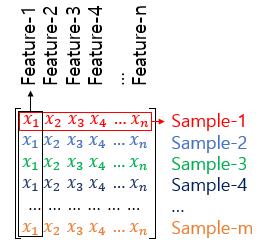

### 혼동행렬
- 정밀도(Precision) : 양성이라고 대답한 전체 케이스 중 실제 양성 비율
- 재현율(Recall)    : 실제 양성 중 양성이라 대답(맞춘) 케이스 비율

### 과적합과 과소적합
- 과적합을 막을 수 있는 드롭아웃(Dropout), 조기 종료(Early Stopping)

## 퍼셉트론(Perceptron)

- 초기 인공신경망 : 퍼셉트론

    - 인공 뉴런 : 활성화 함수 활용
    - 퍼셉트론(인공 뉴런 종류 중 하나) : 계단 함수 사용

![](image/pc.png)

### 단층 퍼셉트론
![](https://wikidocs.net/images/page/24958/perceptron3_final.PNG)

- AND 게이트 구현 : 두 입력이 모두 1인 경우 - 1 출력

In [1]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b =-0.7
    result = x1*w1 + x2*w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [2]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

- NAND 게이트 구현 : 두 입력이 1인 경우에만 - 0 출력 (AND 반대)

In [3]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b =0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

- OR 게이트 구현 : 두 입력이 모두 0인 경우에만 - 0 출력

In [5]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [6]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

- XOR 문제
    - 단층 퍼셉트론으로 구현 불가
    - 곡선(비선형)으로 분리하면 구현 가능 > 다층퍼셉트론
    
![](https://wikidocs.net/images/page/24958/xorgraphandxorgate.PNG)

![](https://wikidocs.net/images/page/24958/xorgate_nonlinearity.PNG)
    

### 다층 퍼셉트론

![](https://wikidocs.net/images/page/24958/perceptron_4image.jpg)

In [12]:
# test
def XOR_gate(x1, x2):
    
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y  = AND_gate(s1, s2)
    
    return y

In [13]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

### 심층 신경망

![](https://wikidocs.net/images/page/24958/%EC%9E%85%EC%9D%80%EC%B8%B5.PNG)

## 단층 퍼셉트론 구현

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
# gpu 사용 확인
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed(777)

In [18]:
device

'cpu'

In [27]:
# XOR 데이터셋
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [28]:
print(X, X.shape)
print(Y, Y.shape)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]]) torch.Size([4, 2])
tensor([[0.],
        [1.],
        [1.],
        [0.]]) torch.Size([4, 1])


In [61]:
(Y * - torch.log(model(X)) + (1-Y) * - torch.log(1-model(X)))

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<AddBackward0>)

In [60]:
(Y * - torch.log(model(X)) + (1-Y) * - torch.log(1-model(X))).sum(dim=1)

tensor([0.6931, 0.6931, 0.6931, 0.6931], grad_fn=<SumBackward1>)

In [62]:
(Y * - torch.log(model(X)) + (1-Y) * - torch.log(1-model(X))).sum(dim=1).mean()

tensor(0.6931, grad_fn=<MeanBackward0>)

- 단층 퍼셉트론 구현 > 시그모이드 활용

In [23]:
# 모델
linear = nn.Linear(2, 1, bias=True)  # input : 2차원, output : 1차원
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [24]:
# 비용함수와 옵티마이저
    # nn.BCELoss()는 이진 분류 - 크로스엔트로피 함수
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [25]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    
    hypothesis = model(X)

    # 비용 계산 후 역전파
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())
        
        # 문제해결 못함

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

- 예측값 확인

In [63]:
model(X)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

In [64]:
(hypothesis > 0.5).float()

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [65]:
Y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [66]:
with torch.no_grad():  # torch.no_grad()
    
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


## 역전파 개념

- 경사하강법: 가중치 업데이트 프로세스

![](https://wikidocs.net/images/page/37406/nn1_final.PNG)

- z : 이전 층의 입력에 가중치를 곱하고 더해진 값
- | : 시그모이드 함수

### 순전파(Forward)

![](https://wikidocs.net/images/page/37406/nn2_final_final.PNG)

![](image/for_1.png)

In [12]:
import torch

# h1, h2
torch.sigmoid(torch.FloatTensor([0.08])), torch.sigmoid(torch.FloatTensor([0.11]))

h1, h2 = torch.sigmoid(torch.FloatTensor([0.08])), torch.sigmoid(torch.FloatTensor([0.11]))

![](image/for_2.png)

In [16]:
0.45 * h1 + 0.4 * h2, 0.7 * h1 + 0.6 * h2
z3, z4 = 0.45 * h1 + 0.4 * h2, 0.7 * h1 + 0.6 * h2

In [18]:
# o1, o2
torch.sigmoid(z3), torch.sigmoid(z4)

(tensor([0.6094]), tensor([0.6638]))

- 비용함수 : 계산
    - MSE

![](image/for_3.png)

### 역전파 1단계
![](https://wikidocs.net/images/page/37406/nn3_final.PNG)

- W5, W6, W7, W8 업데이트

- W5 업데이트 예시

![](image/for_4.png)

- 첫번째 항
![](image/for_5.png)

![](image/for_6.png)

- 두번째 항

[참고] 시그모이드 함수 미분

![](image/for_7.png)

![](image/for_8.png)

- 세번째 항

![](image/for_9.png)

- w5 업데이트(학습률은 0.5라고 가정)

![](image/for_11.png)
![](image/for_10.png)

### 역전파 2단계

![](image/back_1.png)

- 업데이트할 가중치 : W1, W2, W3, W4

- W1 업데이트 예시

![](image/back_2.png)

![](image/back_3.png)
![](image/back_4.png)

![](image/back_5.png)
![](image/back_6.png)

### Re 순전파 : 결과확인

![](image/back_7.png)

## XOR 문제 - 다층 퍼셉트론 구현하기

### 파이토치 구현

In [19]:
import torch
import torch.nn as nn

In [20]:
# GPU 활용시
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [21]:
device

'cpu'

In [22]:
# 데이터

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

![](https://wikidocs.net/images/page/61010/ann.PNG)

In [23]:
# 은닉층이 3개인 인공신경망

model = nn.Sequential(
    nn.Linear(2, 10, bias=True),  # 2> 10(1)
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True), # 10 > 10(2)
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True), # 10 > 10(3)
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),  # 10 > 1
    nn.Sigmoid(),   
).to(device)

In [24]:
# torch.nn.BCELoss()

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [42]:
list(model.parameters())[6].shape

torch.Size([1, 10])

In [43]:
# 10001번 에포크수행 : 에포크마다 순전파 > 역전파 수행

for epoch in range(10001):
    
    # 초기화
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 역전파
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()  # 업데이트

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.693149209022522
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434273719788
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220889091492
1900 0.6931197047233582
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692195892334
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 0

### 다층 퍼셉트론 예측값 확인

- XOR 문제 해결

In [52]:
import numpy as np

with torch.no_grad():
    hypothesis = model(X)  # X 그대로 넣음
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    
    
    print('모델의 출력값(Hypothesis): ', np.round(hypothesis.detach().numpy(),4))
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.000e-04]
 [9.998e-01]
 [9.998e-01]
 [2.000e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 비선형 활성화 함수(Activation function)

- 출력을 받아 "수학적 변환을 수행"하고 출력을 생성하는 함수
- 선형 함수로는 은닉층을 "연속" 추가하더라도 1회 추가한 것과 다를바가 없다
    - 선형함수 사용 층은 가중치가 생긴다

### 시그모이드 함수 - 기울기 소실

- 시그모이드 함수의 문제점은 기울기 계산때 발생 

![](https://wikidocs.net/images/page/60683/simple-neural-network.png)

![](https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%982.PNG)

- 주황색 부분에서 기울기를 계산하면 '0'에 가까운 값 나옴
     * 역전파 과정에서 작은값이 곱해지면 > 앞단에 기울기가 잘 전달 X



    

- 또한 항상 양수를 출력 > 편향이동 이슈 > 기울소실 잘 일어남

- 시그모이드 함수가 은닉층 다수가 될 경우 : 문제 발생(*지양됨)

In [59]:
# 미분 최대값 : 0.25

(torch.sigmoid(torch.FloatTensor([1])) - torch.sigmoid(torch.FloatTensor([0]))) / 1

tensor([0.2311])

### 하이퍼볼릭탄젠트 함수(Tanh)

-  입력값을 -1과 1사이의 값으로 변환

![](https://wikidocs.net/images/page/60683/%ED%95%98%EC%9D%B4%ED%8D%BC%EB%B3%BC%EB%A6%AD%ED%83%84%EC%A0%A0%ED%8A%B8.PNG)

### 렐루 함수(ReLU)

- f(x) = max(0, x) : 음수값 버림
    - 연산속도 빠름
    - dying ReLU 문제

![](https://wikidocs.net/images/page/60683/%EB%A0%90%EB%A3%A8%ED%95%A8%EC%88%98.PNG)

### 리키 렐루 함수(Leaky ReLU)

- dying ReLU 문제 보완
- f(x) = max(ax, x), 일반적으로 a = 0.01

![](https://wikidocs.net/images/page/60683/%EB%A6%AC%ED%82%A4%EB%A0%90%EB%A3%A8.PNG)

### 소프트맥스 함수(softmax)

- 분류 문제는 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용합니다.

![](https://wikidocs.net/images/page/60683/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4.PNG)

## 다층 퍼셉트론으로 손글씨 분류하기

- 숫자 필기 데이터

In [62]:
! pip install -U scikit-learn

     ---------------------------------------- 7.3/7.3 MB 24.7 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 18.5 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 23.3 MB/s eta 0:00:00


In [63]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits()

In [69]:
# 샘플 출력
print(digits.images[1])  # 8x8 

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [70]:
print(digits.target[1])

1


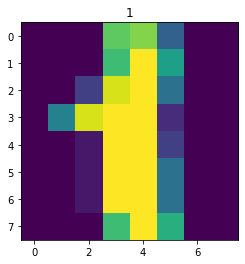

In [71]:
plt.title(digits.target[1])
plt.imshow(digits.images[1])

In [72]:
print("전체 샘플의 수 : {}".format(len(digits.images)))

전체 샘플의 수 : 1797


In [74]:
list(zip(digits.images, digits.target))[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

In [75]:
type(list(zip(digits.images, digits.target))[0])

tuple

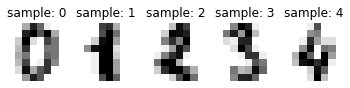

In [76]:
# 시각화

images_and_labels = list(zip(digits.images, digits.target))    # 데이터셋

for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [77]:
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [78]:
# digits.data : 64차원 벡터

print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [79]:
X = digits.data   # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

### 다층 퍼셉트론 분류기

In [81]:
import torch
import torch.nn as nn
from torch import optim

In [82]:
model = nn.Sequential(
    nn.Linear(64, 32),   # 64(input) > 32(1)
    nn.ReLU(),           # ReLU
    nn.Linear(32, 16),   # 32 > 16(2)
    nn.ReLU(),           # RELU
    nn.Linear(16, 10)    # 16 > 10(output)
)

# 마지막에 소프트맥스함수가 없는 이유는 : 비용함수에 소프트맥스 함수가 포함됨

In [83]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [85]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters()) # Adam

In [88]:
losses=[]  # list

In [89]:
for epoch in range(100):  # 에포크 10
    
    # 순전파
    optimizer.zero_grad() # 초기화
    y_pred = model(X)
    
    # 역전파
    loss = loss_fn(y_pred, Y) # softmax 포함되어 비용함수 계산
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.332010
Epoch   10/100 Cost: 2.064430
Epoch   20/100 Cost: 1.818184
Epoch   30/100 Cost: 1.523767
Epoch   40/100 Cost: 1.216749
Epoch   50/100 Cost: 0.942300
Epoch   60/100 Cost: 0.701801
Epoch   70/100 Cost: 0.502762
Epoch   80/100 Cost: 0.369885
Epoch   90/100 Cost: 0.286697


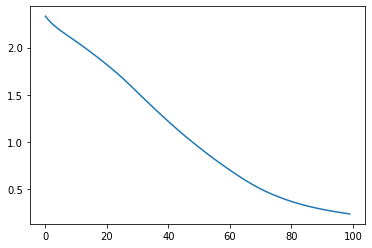

In [93]:
plt.plot(losses)

### 8) 다층 퍼셉트론으로 MNIST 분류하기

- 단층 퍼셉트론 > 다층 퍼셉트론(딥러닝) 

In [99]:
! pip install pandas

     --------------------------------------- 10.6/10.6 MB 36.3 MB/s eta 0:00:00


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [101]:
mnist = fetch_openml('mnist_784', version=1, cache=True) # 판다스로 불러와짐

In [108]:
mnist.data.to_numpy()[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [109]:
mnist.target[0]

'5'

In [110]:
type(mnist.target)

pandas.core.series.Series

In [116]:
# pandas > numpy
mnist.data = mnist.data.to_numpy()
mnist.target = mnist.target.to_numpy().astype(np.int8)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [118]:
X = mnist.data / 255 # 0-255값을 [0,1]로 정규화
Y = mnist.target

In [119]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [120]:
Y[0]

5

In [121]:
X[0].shape

(784,)

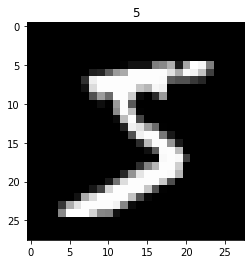

In [123]:
plt.title(Y[0])
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.show()

- 데이터셋

In [164]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split  # 사이킷런

In [165]:
# 시이킷런 분리 > Tensor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/7, random_state=0)

In [166]:
len(X_train), len(X_test)

(60000, 10000)

In [167]:
# Tesnor

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train) # int
y_test = torch.LongTensor(y_test)   # int

ds_train = TensorDataset(X_train, y_train)  # TensorDataset
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)  # DataLoader
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [168]:
X_train[0].shape

torch.Size([784])

- 모델 구현

In [169]:
import torch.nn as nn

# 이렇게도 되는구나
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))  # 784 > 100(1)
model.add_module('relu1', nn.ReLU())              # ReLU
model.add_module('fc2', nn.Linear(100, 100))      # 100 > 100(2)
model.add_module('relu2', nn.ReLU())              # ReLU
model.add_module('fc3', nn.Linear(100, 10))       # 100 > 10(output)

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [170]:
import torch.optim as optim

# 비용함수 및 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [171]:
def train(epoch):
    
    
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 초기화
        outputs = model(data)  # 출력
        
        
        # 역전파
        loss = loss_fn(outputs, targets)  # 오차를 계산
        loss.backward()  
        optimizer.step()  

    print("epoch{}：완료\n".format(epoch))

In [172]:
x = torch.Tensor([[1, 2, 3], [2,3,4]])
torch.max(x, 1)[1]  # label만 가져온거고

tensor([2, 2])

In [173]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산 (softmax를 하고 있다고 봐도 되겠다)
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            # eq 비교
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(
        correct,
        data_num,
        100. * correct / data_num))

In [174]:
test()


테스트 데이터에서 예측 정확도: 1145/10000 (11%)



In [175]:
# 학습

for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9530/10000 (95%)



tensor([-20.5056,   7.0626,  18.7121,   2.6131, -21.5820, -12.1388, -15.6446,
          8.7095, -11.7915,  -9.7331], grad_fn=<AddBackward0>)
tensor(18.7121) tensor(2)
예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


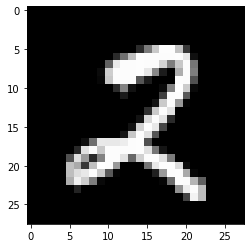

In [176]:
# 특정 인덱스

index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산

_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산
print(output)
print(_, predicted)
print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

## 과적합(Overfitting)

- 학습데이터를 과도하게 학습(노이즈까지 학습)

### 과적합을 막는 방법

- 데이터 양 늘리기 : 데이터 증강 등
- 모델 복잡도 줄이기 : 은닉층 줄이기 등
- 가중치 규제 
    - L1 규제 : 비용함수가 최소 + 가중치 절대값 합도 최소(어떤 특성을 활용 X)
    - L2 규제 : 가중치의 제곱을 최소화하므로 > 0에 가까워짐(* 권장)
        - 옵티마이저의 weight_decay 매개변수
- 드롭아웃 : 학습과정에서 특정 비율의 뉴런을 사용하지 않고 학습

![](https://wikidocs.net/images/page/60751/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.PNG)

## 기울기 소실과 폭주

- 입력층으로 갈수록 기울기가 점차 작아지거나 커지는 현상

### 기울기 소실과 폭주를 막는 방법
- 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트보다 렐루 함수 등을 활용
- 가중치 초기화 : 초기 가중치에 따라 훈련결과 달라짐(기울기 소실 문제 완화)
    - 세이비어 초기화 : 시그모이드나 하이퍼볼릭탄젠트 함수에 활용
    - He 초기화 : ReLU 계열 함수에 적합
- 배치 정규화 : 각 층에 들어가는 입력을 정규화하여 학습 효율화
    - 활성화 함수를 통과하기 전에 수행
- 층 정규화 : RNN 모델에서 활용가능